# Dengue_Fever_in_Tainan-Taiwan_Analysis#
-------------------------------------------------------------------------
#2015年台灣台南地區登革熱患者分布分析#
-------------------------------------------------------------------------

> * 作者:游承霖
> * 完成日期:2018/8/8
> * 建議以PC全頁面閱讀
> * Please read this article with PC (full page).

研究動機
----------------------------------------------------------------------
>在2015年，有22,877名台南市市民被驗出登革熱病毒感染(1.2%總人口)，造成112名患者死亡。
>為近年登革熱疫情大爆發年，該年亦造成台南市9月至年底觀光業業績衰退2成。
--------------------------------------------------------------------------
>我目前就讀於國立成功大學生物科技與產業科學系三年級，同時於醫學院微免所彭貴春老師實驗室進行相關專題研究。
--------------------------------------------------------------------------
登革熱簡介
--------------------------------------------------------------------------
    登革熱（Dengue fever），是一種由登革病毒所引起的急性傳染病，這種病毒會經由蚊子傳播給人類。並且依據不同的血清型病毒，分為Ⅰ、Ⅱ、Ⅲ、Ⅳ四種型別，而每一型都具有能感染致病的能力。患者感染到某一型的登革病毒，就會對那一型的病毒具有終身免疫，但是對於其他型別的登革病毒僅具有短暫的免疫力，還是有可能再感染其他血清型別病毒。

    臨床上重複感染不同型登革病毒，可引起宿主不同程度的反應，從輕微或不明顯的症狀，到發燒、出疹的典型登革熱，或出現嗜睡、躁動不安、肝臟腫大等警示徵象，甚至可能導致嚴重出血或嚴重器官損傷的登革熱重症。

    全球登革熱的好發地區，主要集中在熱帶、亞熱帶等有埃及斑蚊和白線斑蚊分布的國家，隨著全球化發展逐漸便利，各國之間相互流通及往返也趨於頻繁，自1980年代之後，登革熱也開始向各國蔓延，成為嚴重的公共衛生問題。臺灣位於亞熱帶地區，像這樣有點熱、又有點溼的環境，正是蚊子最喜歡的生長環境，為登革熱流行高風險地區。
詳見:https://www.cdc.gov.tw/diseaseinfo.aspx?treeid=8d54c504e820735b&nowtreeid=dec84a2f0c6fac5b&tid=77BFF3D4F9CB7982

## 0.Import module
-------------------------------------------------------------------------
>1. requests: for internet connecting and vistit website with python.
2. pandas: for dataframe building, which is easier using for data science.
3. csv: for csv-formatted data transforming.
4. matplotlib.pyplot: for data-visualization and print out. 


In [1]:
import requests
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline

## 1.資料取得和資料整理
-------------------------------------------------------------------------
> * 政府資料開放平台-臺南市本土登革熱病例數:https://data.gov.tw/dataset/53946
> * 臺南市政府民政局-人口資料:http://web.tainan.gov.tw/agr/list.asp?nsub=I4A400 ，由於資料內容型式為複數個Excel頁籤，
    且資料格式型式較為複雜，故先行選取2015年人口資料匯入新建立的2015_population.csv檔，再另外匯入dengue104.csv，並進行資料合併。

> * 臺南市本土登革熱病例數，爬蟲後存成dengue104.csv，
> * 之後都以pd.read_csv開檔，就會是方便運用的dataframe(df)格式。
> * 以df.drop()去除原本資料內添加的"編號"

In [2]:
url="http://data.tainan.gov.tw/dataset/3ad9da64-0c29-4299-b769-320b57a09be8/resource/7617bfcd-20e2-4f8d-a83b-6f6b479367f9/download/dengue104unicode.csv"
response=requests.get(url)
# print(response.encoding)
response.encoding = 'utf-8'
data=response.text
# print(new_data)

with open("dengue104.csv","w", encoding='utf-8-sig') as f:
    f.write(data)
with open("dengue104.csv","r", encoding='utf-8-sig') as f:
    df = pd.read_csv(f)
    df
    delnumber= df.drop(["編號"],axis=1,inplace=True)
    delnumber
    print(df.head()) 
    # print(type(df))

         確診日   區別   里別 道路名稱    緯度座標     經度座標
0   2015/1/6  關廟區  南花里  明德街  22.987  120.234
1  2015/1/19   東區  文聖里  裕文路  22.979  120.197
2  2015/5/21   北區  六甲里  和緯路  22.997  120.198
3  2015/5/24   北區  六甲里  和緯路  22.997  120.198
4   2015/6/4   北區  六甲里  和緯路  23.005  120.209


> * 2015年台南市人口資料(2015_population.csv)，後續需要時再利用panda.merge合併進dengue104.csv

In [3]:
with open("2015_population.csv","r", encoding='big5', errors='ignore') as f:
            pop = pd.read_csv(f)
            print(pop.head())

    區別  土地面積(平方公里 )    人口數  人口密度(每平方公里)
0  新營區      38.5386  78165  2028.226246
1  鹽水區      52.2455  26085   499.277450
2  白河區     126.4046  29271   231.565940
3  柳營區      61.2929  21629   352.879371
4  後壁區      72.2189  24329   336.878573


# 2.每月患者人數統計與氣溫之相關性分析:
----------------------------------------------
> * 我們利用df[].tolist()來取'確診日'欄目資料
> * 資料是像2015/1/6形式，但我們只需要月份，所以用.split("/")切開字串，再取中間的月份，並統計患者數目。
> * 利用matplotlib.pyplot as plt畫出直方圖
> * 插入台南月均溫圖片進行比較分析

[2, 0, 0, 0, 2, 11, 202, 3023, 13054, 5569, 910, 104]


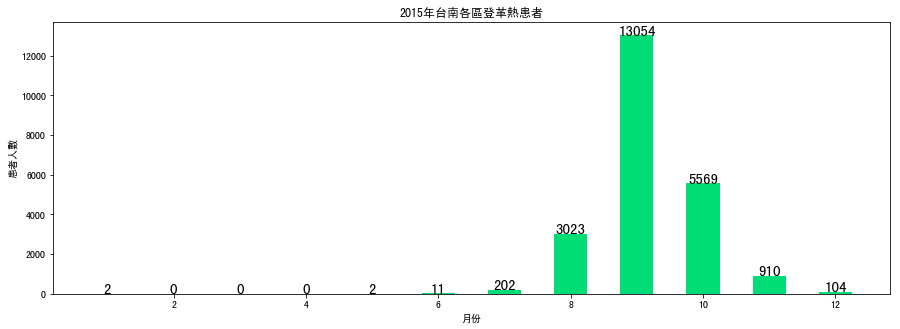

In [4]:
def monthly_patient():
    with open("dengue104.csv","r", encoding='utf-8-sig') as f:
        df = pd.read_csv(f)

        x = [0]* 12
        monthly=df['確診日'].tolist()
        for i in range(len(monthly)):
            x[int(monthly[i].split("/")[1])-1] += 1
        
        month=[1,2,3,4,5,6,7,8,9,10,11,12]
        amount=x
        print(amount)
        plt.figure(figsize=(15,5))#輸出圖片大小
        plt.xlabel("月份")
        plt.ylabel("患者人數")
        plt.title('2015年台南各區登革熱患者')
        plt.bar(month,amount , align = 'center' , facecolor = '#00DD77'  , width = 0.5)
        
        for a,b in zip(month, amount):
            plt.text(a, b, str(b),horizontalalignment='center',fontsize=15)
        plt.show()
monthly_patient()

 * 分析:
    #患者人數影響因子: 溫度
> * 由兩張圖比較可知，台南市最高氣溫和最低氣溫與患者數量之關係並不顯著，登革熱在7月(最高之高溫低溫)患者人數並不是最高的，
反而是在9月患者人數驟增。
<img style="float: middle;" src="https://lh3.googleusercontent.com/Z-uHnhVmCzW8e7L8fQbqYxeRmtWc0N7hzTCdvb1OUa7NnYWn1q5rDZKeA0lkpBzEIVFpGscNkWdl0N0LQxVCRxAQlRozP9_Mevc4Tg=w943-h470-rw-no" width="90%">
資料:NOAA

# 3.地區患者人數與地緣分析:
----------------------------------------------
> * 我們利用df.groupby("區別").size()來自行計算各地區患者數目，並建立series欄目資料
> * 用.list轉換series的index為list
> * 用.tolist()轉換series為list
> * 利用matplotlib.pyplot as plt畫出直方圖
> * 插入台南行政區圖片進行比較分析

['七股區', '下營區', '中西區', '仁德區', '佳里區', '六甲區', '北區', '南化區', '南區', '善化區', '大內區', '學甲區', '安南區', '安定區', '安平區', '官田區', '將軍區', '山上區', '左鎮區', '後壁區', '新化區', '新市區', '新營區', '東區', '東山區', '柳營區', '楠西區', '歸仁區', '永康區', '玉井區', '白河區', '西港區', '關廟區', '鹽水區', '麻豆區', '龍崎區']
[21, 16, 3492, 305, 69, 14, 5772, 11, 3529, 89, 10, 27, 1875, 53, 904, 22, 7, 6, 10, 7, 155, 69, 108, 3141, 4, 18, 8, 208, 2703, 65, 9, 20, 57, 15, 53, 5]


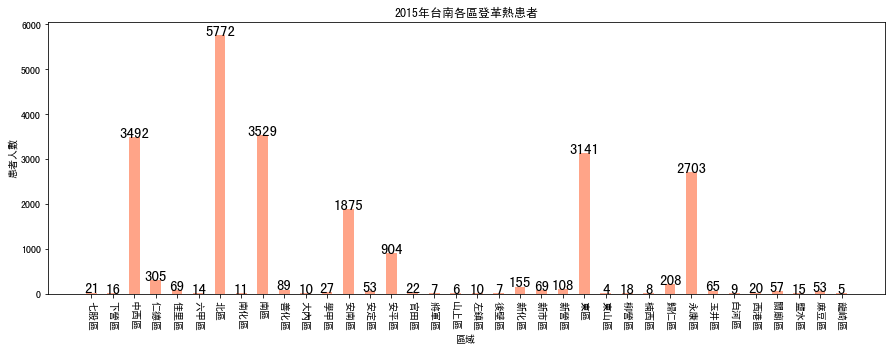

In [5]:
def district_count():
    with open("dengue104.csv","r", encoding='utf-8-sig') as f:
        df = pd.read_csv(f)

        frame_district=df.groupby("區別").size()
        a=list(frame_district.index)
        b = frame_district.tolist()
        print(a)
        print(b)# print(frame_district)
        
        plt.figure(figsize=(15,5))#輸出圖片大小
        plt.xlabel("區域")
        plt.ylabel("患者人數")
        plt.title('2015年台南各區登革熱患者')
        plt.bar(a,b , align = 'center' , facecolor = '#FFA488'  , width = 0.5)
        locs, labels = plt.xticks()           # Get locations and labels
        plt.xticks(a, a,rotation=270) 
        for a,b in zip(a, b):
            plt.text(a, b, str(b),horizontalalignment='center',fontsize=15)
        plt.show()
district_count()  

 * 分析:
    #患者人數影響因子:  緯度高低 、 都市<=>鄉村
> * 由圖表對照地圖可知，緯度較低的行政區，患者人數較多，又以台南市舊市區(都市)的患者人數高於舊台南縣(鄉村)。
<img style="float: middle;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Tainan_map.png" width="50%">

# 4.地區患者人數與地緣分析:
----------------------------------------------
> * 我們利用df.groupby("區別").size()來自行計算各地區患者數目，並建立series欄目資料
> * 開啟2015_population.csv並利用.to_frame().merge(pop, on='區別')來合併進"區別"，建立新df
> * 用.tolist()轉換df欄目為list
> * 用plt.subplot()來一次設定圖片(數張子圖)
> * 利用matplotlib.pyplot as plt畫出斜線圖
> * 利用matplotlib.pyplot as plt畫出直方圖
> * 進行比較分析

    區別     0  土地面積(平方公里 )    人口數   人口密度(每平方公里)
0  七股區    21     110.1492  23365    212.121377
1  下營區    16      33.5291  24786    739.238453
2  中西區  3492       6.2600  77498  12379.872200
3  仁德區   305      50.7664  73887   1455.431151
4  佳里區    69      38.9422  59555   1529.317809


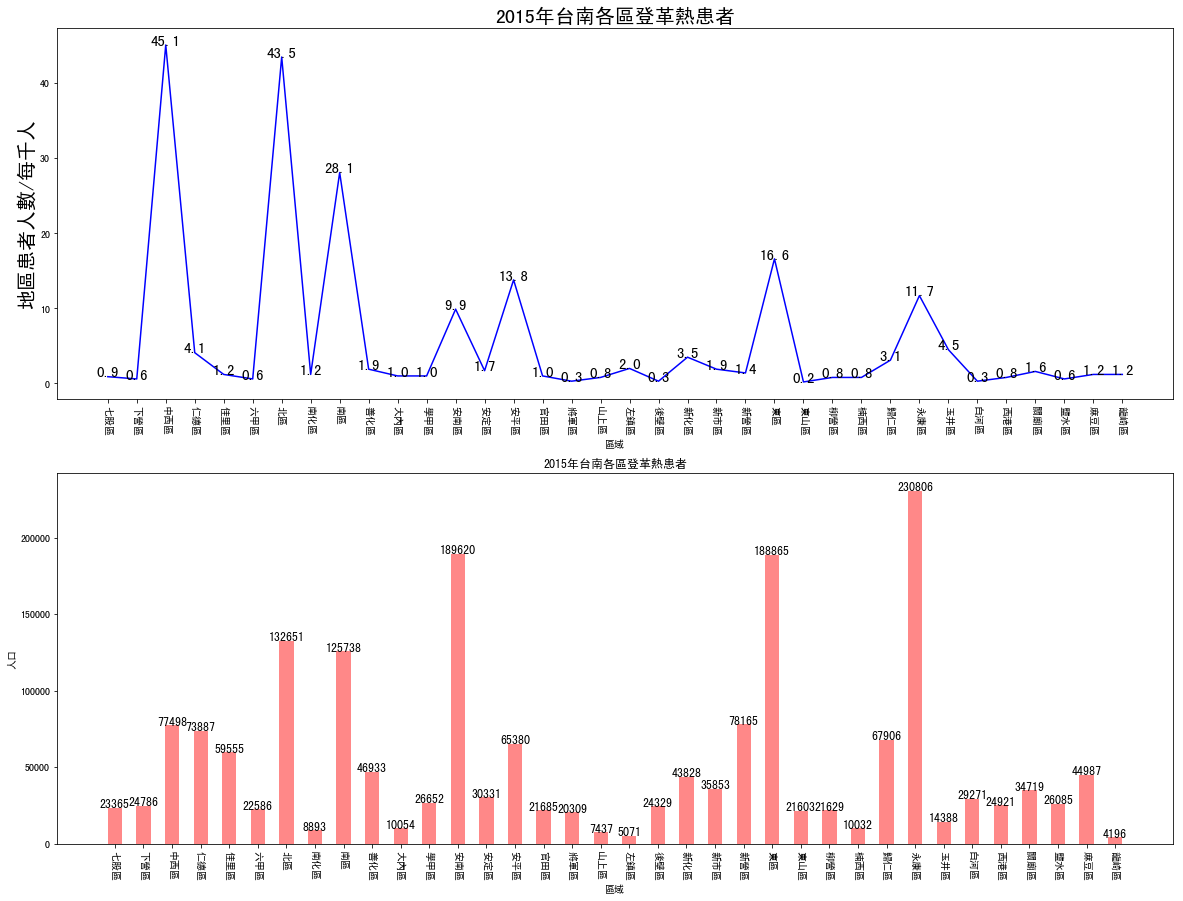

In [6]:
def population_percent():
    with open("dengue104.csv","r", encoding='utf-8-sig') as f:
        df = pd.read_csv(f)
        with open("2015_population.csv","r", encoding='big5', errors='ignore') as f:
            pop = pd.read_csv(f)
            frame=df.groupby("區別").size()
            frame_district=frame.to_frame()
            frame_population=frame_district.merge(pop, on='區別')#合併表格
            print(frame_population.head())#新表格
            
            district= frame_population['區別'].tolist()#df取list
            patient = frame_population[0].tolist()
            population=frame_population["人口數"].tolist()

            average=[]                    #做出每千人患者數量seris
            for i in range(len(patient)):
                x=patient[i]/population[i]*1000
                average.append(round(x,1))#每千人
            average=pd.Series(average)
            
            frame_population['每千人'] = average.values #df加入每千人患者數量seris
            # 斜線圖
            plt.figure(figsize=(20,15))
            plt.subplot(2,1,1)            
            plt.xlabel("區域")
            plt.ylabel("地區患者人數/每千人",fontsize=20)
            plt.title('2015年台南各區登革熱患者',fontsize=20)
            plt.plot(district,average , 'blue')
            locs, labels = plt.xticks()           # Get locations and labels
            plt.xticks(district, district,rotation=270) 
            for a,b in zip(district, average):
                plt.text(a, b, str(b),horizontalalignment='center',fontsize=15)
            # 直方圖
            plt.subplot(2,1,2)  
            plt.xlabel("區域")
            plt.ylabel("人口")
            plt.title('2015年台南各區登革熱患者')
            plt.bar(district,population , align = 'center' , facecolor = '#FF8888'  , width = 0.5)
            
            locs, labels = plt.xticks()           # Get locations and labels
            plt.xticks(district, district,rotation=270) 
            for a,b in zip(district, population):
                plt.text(a, b, str(b),horizontalalignment='center',fontsize=12)
            plt.show()
            
population_percent()

 * 分析:
> * 對前面的    患者人數影響因子:  緯度高低 、 都市<=>鄉村      進行進一步分析
> * 由於只考慮地區患病人口總數，並未考量地區的人口各有不同，因此上圖列出  各地區每一千人中 患者數量。
> * 由兩圖表對照地圖可知，緯度較低的行政區，患者人數較多，又以台南市舊市區(都市)的患者人數高於舊台南縣(鄉村)。
<img style="float: middle;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Tainan_map.png" width="50%">